# 1 Author

**Student Name**:  JAYANT PAWAR

**Student ID**:  210761612



# 2 Problem formulation

From the given dataset of humming and whistling, build a machine learning pipeline that takes input a audio and predicts its song label(Potter)


# 3 Machine Learning pipeline

**MACHINE LEARNING PIPELINE** >> Data collection and Data Extraction > Data Cleaning > Feature extraction > Model fitting and Model validation > Visualisation


In [1]:
# importing important libraries of python 
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


# Data download



First, we will define a function that allow us to download a file into a particular location.

In [2]:
#Define a function that will allow us to download a file into a chosen location:
def download_url (url, save_path):
  with urllib.request.urlopen(url) as dl_file:
    with open(save_path, 'wb') as out_file:
      out_file.write(dl_file.read())

In [3]:
#Download the data
urllist = ["https://collect.qmul.ac.uk/down?t=6PF2H2T4GP4I1LPK/45OGPQAA1S6E5AEAA2RLEU0", "https://collect.qmul.ac.uk/down?t=4H6293T0GAQLO4RG/55TMAI1BTPMG7I1A71923EO", "https://collect.qmul.ac.uk/down?t=45PGP4DEJH9JLV8U/4H7ITD5VEBGREV4UGNI8SAO","https://collect.qmul.ac.uk/down?t=652DPSGDVKPDJ7NV/6PF3DFT4AN3AOPS5JJS9KFG"]
savepathlist = ['/content/drive/MyDrive/Data/MLEndHW/Potter1.zip','/content/drive/MyDrive/Data/MLEndHW/Potter2.zip','/content/drive/MyDrive/Data/MLEndHW/StarWars1.zip','/content/drive/MyDrive/Data/MLEndHW/StarWars2.zip']
#download_url(urllist, savepathlist)

In [4]:
for url, savepath in zip(urllist,savepathlist):
  download_url(url, savepath)


In [5]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)
# NOTE~~~~~~~ Advance and basic mini projects files are in same folder therefore there are 8 files and 2 folders in drive

['Sdata',
 'Potter11.zip',
 'Potter22.zip',
 'Panther11.zip',
 'Panther22.zip',
 'Adata',
 'Potter1.zip',
 'Potter2.zip',
 'StarWars1.zip',
 'StarWars2.zip']

# Understanding our dataset sample

Let's unzip the sample data and check how many audio files we have.

In [6]:
# Extracting the datasets
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Sdata/'
zip_path = ['/content/drive/MyDrive/Data/MLEndHW/Potter1.zip','/content/drive/MyDrive/Data/MLEndHW/Potter2.zip','/content/drive/MyDrive/Data/MLEndHW/StarWars1.zip','/content/drive/MyDrive/Data/MLEndHW/StarWars2.zip']
for i in range(len(zip_path)):
  with zipfile.ZipFile(zip_path[i], 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [7]:
song_path = '/content/drive/MyDrive/Data/MLEndHW/Sdata/*.wav'
files = glob.glob(song_path)
len(files)

824

lets look at the name of 824 audio file:

In [8]:
for file in files:
  print(file.split('/')[-1])

S50_hum_2_Potter.wav
S50_whistle_2_Potter.wav
S51_hum_1_Potter.wav
S51_hum_2_Potter.wav
S52_hum_2_Potter.wav
S52_whistle_2_Potter.wav
S53_hum_2_Potter.wav
S53_hum_1_Potter.wav
S54_hum_2_Potter.wav
S54_whistle_2_Potter.wav
S55_harrypotter_hum_2.wav
S55_harrypotter_whistle_1.wav
S57_hum_2_Potter.wav
S56_whistle_2_Potter.wav
S56_hum_2_Potter.wav
S57_whistle_2_Potter.wav
S58_hum_1_Potter.wav
S59_hum_1_Potter.wav
S58_hum_2_Potter.wav
S59_hum_2_Potter.wav
S60_hum_1_[Potter].wav
S60_whistle_1_[Potter].wav
S61_whistle_1_[Potter].wav
S61_hum_1_[Potter].wav
S62_hum_1_Potter.wav
S62_hum_2_Potter.wav
S63_hum_4_[Potter].wav
S63_hum_1_[Potter].wav
S64_whistle_2_Potter.wav
S64_hum_2_Potter.wav
S65_hum_1_Potter.wav
S65_hum_2_Potter.wav
S66_whistle_2_Potter.wav
S66_hum_2_Potter.wav
S67_hum_2_Potter.wav
S67_whistle_2_Potter.wav
S68_whistle_2_Potter.wav
S68_hum_2_Potter.wav
S69_hum_2_Potter.wav
S69_hum_1_Potter.wav
S70_hum_1_Potter.wav
S70_hum_2_Potter.wav
S71_hum_1_Potter.wav
S71_hum_2_Potter.wav
S72_wh

we can see, that the name of each file follows the naming convention `[Participant ID]_[type of recording]_[interpretation number]_[song]`. We can parse each file name and extract this information.

In [9]:
print('The full path to the first audio file is: ', files[148])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/Sdata/S132_hum_2_Potter.wav


The name of the first audio file is:  S50_hum_2_Potter.wav
    The participand ID is:  S50
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Potter.wav


We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [10]:
MLENDHW_table = [] 

for file in files:
  try:
   file_name = file.split('/')[-1]
   extension = file.split('/')
   participant_ID = file.split('/')[-1].split('_')[0]
   interpretation_type = file.split('/')[-1].split('_')[1]
   interpretation_number = file.split('/')[-1].split('_')[2]
   song = file.split('/')[-1].split('_')[3].split('.')[0]
   
   if song == "Potter" or "StarWars":
    MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
  except :
    continue
MLENDHW_table

[['S50_hum_2_Potter.wav', 'S50', 'hum', '2', 'Potter'],
 ['S50_whistle_2_Potter.wav', 'S50', 'whistle', '2', 'Potter'],
 ['S51_hum_1_Potter.wav', 'S51', 'hum', '1', 'Potter'],
 ['S51_hum_2_Potter.wav', 'S51', 'hum', '2', 'Potter'],
 ['S52_hum_2_Potter.wav', 'S52', 'hum', '2', 'Potter'],
 ['S52_whistle_2_Potter.wav', 'S52', 'whistle', '2', 'Potter'],
 ['S53_hum_2_Potter.wav', 'S53', 'hum', '2', 'Potter'],
 ['S53_hum_1_Potter.wav', 'S53', 'hum', '1', 'Potter'],
 ['S54_hum_2_Potter.wav', 'S54', 'hum', '2', 'Potter'],
 ['S54_whistle_2_Potter.wav', 'S54', 'whistle', '2', 'Potter'],
 ['S55_harrypotter_hum_2.wav', 'S55', 'harrypotter', 'hum', '2'],
 ['S55_harrypotter_whistle_1.wav', 'S55', 'harrypotter', 'whistle', '1'],
 ['S57_hum_2_Potter.wav', 'S57', 'hum', '2', 'Potter'],
 ['S56_whistle_2_Potter.wav', 'S56', 'whistle', '2', 'Potter'],
 ['S56_hum_2_Potter.wav', 'S56', 'hum', '2', 'Potter'],
 ['S57_whistle_2_Potter.wav', 'S57', 'whistle', '2', 'Potter'],
 ['S58_hum_1_Potter.wav', 'S58', 'hu

In [11]:
# creating a dataframe of dataset from table.
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df.head(5)

,participant,interpretation,number,song
file_id,,,,
S50_hum_2_Potter.wav,S50,hum,2,Potter
S50_whistle_2_Potter.wav,S50,whistle,2,Potter
S51_hum_1_Potter.wav,S51,hum,1,Potter
S51_hum_2_Potter.wav,S51,hum,2,Potter
S52_hum_2_Potter.wav,S52,hum,2,Potter


# Data Preprocessing



In [12]:
#Lets find some unorganized song label data
MLENDHW_df['song'].unique()

array(['Potter', '2', '1', '[Potter]', '[potter]', 'harry potter',
       'potter', 'Harry', '(potter)', '[Potter] ', 'StarWars', 'Starwars',
       'starwar', '[StarWars]', 'starwars', '[ Star Wars ]', '[StatWars]',
       '[Starwars]', 'StarsWars', 'Star wars', 'star wars', 'Imperial',
       'March', '(starwars)', 'imperial', '[StarWars] ', 'star',
       '[STARWARS]', 'StartWars', 'Potter ', 'Potterwav'], dtype=object)

In [13]:
# here we will replace all the unorganised song label data into structured data for Potter song
MLENDHW_df['song'].replace(to_replace =["potter", "potter ",'Potterwav','[potter]',
       'harry potter', 'Harry', '(potter)', '[Potter] ','[Potter]','Potter ','1'], 
                            value ="Potter", inplace=True)

In [14]:
# here we will replace all the unorganised song label data into structured data for StarWars song

MLENDHW_df['song'].replace(to_replace =['Starwars', 'starwar', '[StarWars]','StarWar'
       'starwars', '[ Star Wars ]', '[StatWars]', '[Starwars]',
       'StarsWars', 'Star wars', 'star wars', 'Imperial', 'March',
       '(starwars)', 'imperial', '[StarWars] ', 'star', '[STARWARS]',
       'starwars',
       'StartWars','2'], value ="StarWars", inplace=True)

In [15]:
#here we will find all the unstructured interpretation data.
MLENDHW_df['interpretation'].unique()

array(['hum', 'whistle', 'harrypotter', 'Hum', 'Whistle', 'whisle',
       'starwars', 'hum2', 'whislte'], dtype=object)

In [16]:
#lets process all the unstructured interpretation data for humming.
MLENDHW_df['interpretation'].replace(to_replace =['Hum', 'harrypotter', 'hum2'], value ="hum", inplace=True)

In [17]:
#lets process all the unstructured interpretation data for whistling.

MLENDHW_df['interpretation'].replace(to_replace =['Whistle','whisle','whislte','starwars'], value ="whistle", inplace=True)


In [18]:
#here we will find all the unorganised data number.
MLENDHW_df['number'].unique()

array(['2', '1', 'hum', 'whistle', '4', '3', 'Imperial'], dtype=object)

In [19]:
#now we will find all the unorganised data number.

MLENDHW_df['number'].replace(to_replace =['hum', 'whistle', 'Imperial' ], value ="2", inplace=True)

In [20]:
MLENDHW_df.head()

,participant,interpretation,number,song
file_id,,,,
S50_hum_2_Potter.wav,S50,hum,2,Potter
S50_whistle_2_Potter.wav,S50,whistle,2,Potter
S51_hum_1_Potter.wav,S51,hum,1,Potter
S51_hum_2_Potter.wav,S51,hum,2,Potter
S52_hum_2_Potter.wav,S52,hum,2,Potter


# 4 Transformation stage
Following feature extraction transformations,

# Feature extraction : Picth

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

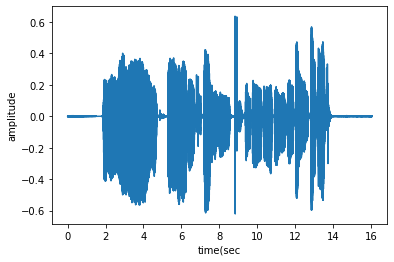

In [21]:
n = 0
fs = None 
x, fs = librosa.load(files[n], sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time(sec')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

Let's look at the number of samples in one of our audio files:

In [22]:
n = 0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 708507 samples


we are using a raw audio signal as the input of a machine learning model, we will be operating in a predictor space consisting of hundreds of thousands of dimensions.

One approach to deal with this huge dimensionality is to extract a few features from our signals and use these features as predictors instead. In this notebook we will use four audio features, namely:


1.   Power.
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.

In the next cell, we define a new function that gets the pitch of an audio signal

In [23]:
#here we are extracting the features
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [24]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    try:
     file_name = file.split('/')[-1]
     fileID = file.split('/')[-1]
     yi = labels_file.loc[fileID]['song']=='Potter'

     fs = None # if None, fs would be 22050
     x, fs = librosa.load(file,sr=fs)
     if scale_audio: x = x/np.max(np.abs(x))
     f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
     power = np.sum(x**2)/len(x)
     pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
     pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
     voiced_fr = np.mean(voiced_flag)

     xi = [power,pitch_mean,pitch_std,voiced_fr]
     X.append(xi)
     y.append(yi)
    except:
      continue 
  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`). This could take a while, as we are processing each of the 824 recordings. 

In [25]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 824/824 [37:16<00:00,  2.71s/it]


In [26]:
#shape of the x and y and the labels vector y :
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (818, 4)
The shape of y is (818,)
The labels vector is [ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

As you can see, we have 824 items consisting of 4 features (stored in `X`) and one binary label (stored in `y`). Is our dataset balanced? Let's have a look:

In [27]:
print(' The number of hum recordings is ', np.count_nonzero(y))
print(' The number of whistle recordings is ', y.size - np.count_nonzero(y))

 The number of hum recordings is  409
 The number of whistle recordings is  409


# 5 Modelling

The Machine Learning models that we will implement. 
1. Support Vector Machines.
2. RandomForestClassifier.
3. DecisionTreeClassifier.


# Modeling: Support Vector Machines

Let's build a support vector machine (SVM) model for the predictive task of identifying the type of song (potter) of an audio signal, using the dataset that we have just created.

We will use the SVM method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set.

In [28]:
#spliting the dataset into training and testing datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((572, 4), (246, 4), (572,), (246,))

Let's now fit an SVM model and print both the training accuracty and validation accuracy.

In [29]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5244755244755245
Validation  Accuracy 0.44308943089430897
The support vectors are (546, 4)


Let's normalise the predictors, to see if the performance improves.

In [30]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.791958041958042
Validation  Accuracy 0.6666666666666666
The support vectors are (478, 4)


#RandomForestClassifier
Let's build a Random Forest classifier model for the predictive task of identifying the type of song (potter) of an audio signal, using the dataset that we have just created.

We will use the this method provided by sklearn and will split the dataset defined by X and y into a training set and a validation set.

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
yt_pr = clf.predict(X_train)
yv_pr = clf.predict(X_val)
print('Training Accuracy', np.mean(yt_pr==y_train))
print('Validation  Accuracy', np.mean(yv_pr==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.6544715447154471


In [33]:
from sklearn.tree import DecisionTreeClassifier 
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dtrain = clf.predict(X_train)
dtest = clf.predict(X_val)
print('Training Accuracy', np.mean(dtrain==y_train))
print('Validation  Accuracy', np.mean(dtest==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.6544715447154471


# 8 Results

After applying following features and machine learning models in this solution we conclude to following results:
1. Traning accuracy of support vector machine (SVM) model = 0.5244755244755245
2. Validation accuracy of support vector machine (SVM) model = 0.44308943089430897
3. Traning accuracy of support vector machine (SVM) model after normalise the predictors = 0.791958041958042
4. Validation accuracy of support vector machine (SVM) model after normalise the predictors =  0.6666666666666666

2.1 Random forest classifier training Accuracy = 1.0

2.1 Random forest classifier validation Accuracy = 0.6544715447154471

3.1 DecisionTreeclassifier training Accuracy = 1.0

3.2 DecisionTreeclassifier validation Accuracy = 0.6544715447154471


# 9 Conclusions
Here we can see that RandomforestClassifier and DecisionTreeClassifier have same validation accuracy  where as support vector machine model has lower accuracy comparing to them.


As we have seen an example of audio classification which is one of the most foundational problems in audio deep learning. Now a days this is widely used in a range of applications and many of the concepts and techniques that we covered here will be relevant to more audio problems in future days. Google hum to search is one of such examples of this MachineLearning solution.